# Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd

df_fake = pd.read_csv("/kaggle/input/fake-news/Fake.csv")
df_real = pd.read_csv("/kaggle/input/fake-news/True.csv")

df_fake['label'] = 0
df_real['label'] = 1
df = pd.concat([df_fake, df_real], ignore_index=True).sample(frac=1, random_state=42)

print(df.head())
print(f"Dataset size: {len(df)} rows, columns: {list(df.columns)}")


                                                   title  \
22216  Ben Stein Calls Out 9th Circuit Court: Committ...   
27917  Trump drops Steve Bannon from National Securit...   
25007  Puerto Rico expects U.S. to lift Jones Act shi...   
1377    OOPS: Trump Just Accidentally Confirmed He Le...   
32476  Donald Trump heads for Scotland to reopen a go...   

                                                    text       subject  \
22216  21st Century Wire says Ben Stein, reputable pr...       US_News   
27917  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
25007  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
1377   On Monday, Donald Trump once again embarrassed...          News   
32476  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                      date  label  
22216    February 13, 2017      0  
27917       April 5, 2017       1  
25007  September 27, 2017       1  
1377          May 22, 2017      0  
32476       Ju

In [ ]:
df

,title,text,subject,date,label
22216,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
27917,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
25007,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
1377,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
32476,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...
11284,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44732,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
38158,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
860,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


# Data Inspection and Cleaning

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   label    44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

index      0
title      0
text       0
subject    0
date       0
label      0
dtype: int64

# Text Preprocessing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer , PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout , GRU

In [ ]:
df

,index,title,text,subject,date,label
0,22216,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,27917,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,25007,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,1377,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,32476,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...,...
44893,11284,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,44732,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,38158,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,860,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [ ]:
def clean_text(i):
  i = re.sub('[^a-zA-Z]',' ',i)
  i = re.sub(r'\b(reuters|bbc|cnn|nytimes)\b', '', i)
  i = i.lower()
  i = i.split()
  i = [word for word in i if word not in stopwords.words('english')]
  i = ' '.join(i)
  return i


In [ ]:
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)



# Combining Title and Article Text

In [ ]:
# texts
texts = (df['title'] + " " + df['text']).tolist()

['ben stein calls th circuit court committed coup tat constitution st century wire says ben stein reputable professor pepperdine university also hollywood fame appearing tv shows films ferris bueller day made provocative statements judge jeanine pirro show recently discussing halt imposed president trump executive order travel stein referred judgement th circuit court washington state coup tat executive branch constitution stein went call judges seattle political puppets judiciary political pawns watch interview complete statements note stark contrast rhetoric leftist media pundits neglect note court ever blocked presidential orders immigration past discuss legal efficacy halt actual text executive order read trump news st century wire trump filessupport work subscribing becoming member wire tv',
 'trump drops steve bannon national security council washington reuters u president donald trump removed chief strategist steve bannon national security council wednesday reversing controversi

In [ ]:
labels = df['label'].values


# Tokenization and Padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pickle
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
max_len = 300
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, stratify=labels, random_state=42)


# **GRU Model**

In [ ]:
vocab_size = 50000     # or len(tokenizer.word_index) + 1
embedding_dim = 128
max_len = 300

In [ ]:
GRU_model = Sequential()
GRU_model.add(Embedding(vocab_size , embedding_dim))
GRU_model.add(GRU(128 , dropout=0.3, recurrent_dropout=0.2 ))
GRU_model.add(Dense(64, activation='relu'))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(1, activation='sigmoid'))

I0000 00:00:1762195031.520596      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
GRU_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# GRU Training and Accuracy Plot

In [ ]:
GRU_history = GRU_model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=64)

Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 349s 670ms/step - accuracy: 0.6412 - loss: 0.5789 - val_accuracy: 0.9755 - val_loss: 0.0944
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 341s 673ms/step - accuracy: 0.9859 - loss: 0.0652 - val_accuracy: 0.9944 - val_loss: 0.0256
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 342s 675ms/step - accuracy: 0.9953 - loss: 0.0228 - val_accuracy: 0.9978 - val_loss: 0.0121
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 341s 674ms/step - accuracy: 0.9860 - loss: 0.0423 - val_accuracy: 0.9816 - val_loss: 0.0538
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 341s 674ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9978 - val_loss: 0.0046


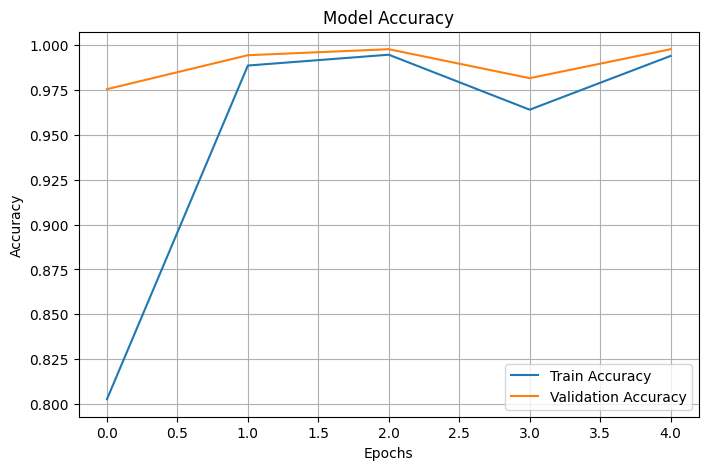

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(GRU_history.history['accuracy'], label='Train Accuracy')
plt.plot(GRU_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
GRU_model.save("GRU_Model.h5")

# Simple RNN Model Architecture

In [ ]:
from tensorflow.keras.layers import SimpleRNN

RNN_model = Sequential([
    Embedding(vocab_size, embedding_dim),
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# RNN Training and Evaluation

In [ ]:
RNN_history = RNN_model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=32)


Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.5233 - loss: 0.6929 - val_accuracy: 0.5237 - val_loss: 0.6920
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.5274 - loss: 0.6920 - val_accuracy: 0.5237 - val_loss: 0.6922
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.5251 - loss: 0.6921 - val_accuracy: 0.5237 - val_loss: 0.6906
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.5220 - loss: 0.6924 - val_accuracy: 0.5237 - val_loss: 0.6908
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.5236 - loss: 0.6922 - val_accuracy: 0.5237 - val_loss: 0.6885


In [ ]:
loss, acc = RNN_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5149 - loss: 0.6929
Test Accuracy: 0.5229


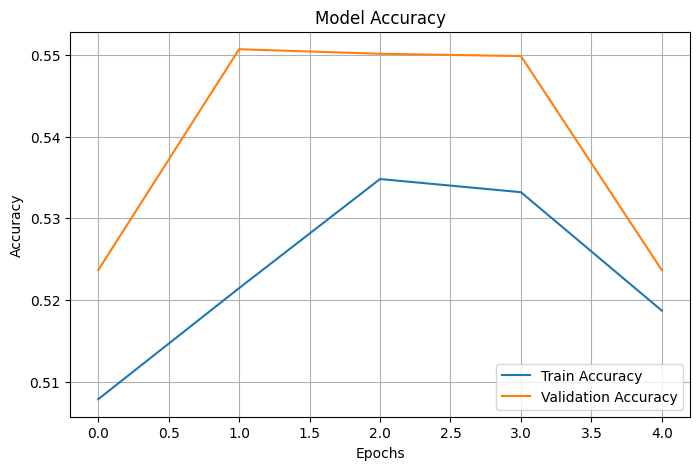

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(RNN_history.history['accuracy'], label='Train Accuracy')
plt.plot(RNN_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()